# DATA 606 Project - Analysis of Uber & Lyft ride details


* We've all experienced those moments when we open the Uber or Lyft app and wonder why the ride prices seem to be all over the place. Well, it turns out that it's not just random. Those prices can change because of a lot of factors, and one of those factors is the weather.

* Think about it - when it's pouring rain, everyone wants to get a ride rather than getting soaked. Or on a super hot day, you might prefer to avoid walking in the scorching sun. These weather conditions can make ride-hailing services like Uber and Lyft busier, and when there's high demand, they often increase their prices. That's what they call "surge pricing."

* But there's more to it than just that. Different types of weather can also affect how long your ride takes or the route your driver takes. All of these things can add up and influence how much you pay for your ride.

* So, here's the deal: we've got a bunch of data that tells us all about rides, prices, and the weather. We're going to dig into this data to find out how the weather and ride prices are connected.


## About the data



 For this analysis, I am using a dataset from Kaggle. This is a very beginner-friendly dataset. It does contain a lot of NA values. It is a good dataset if you want to use machine learning models and understand real-world data.

* It provides some important trip details and the corresponding weather at that time; I believe the weather will affect the trip prices. You can learn more about the details of every column in further notes, and I feel this analysis is a level one difficulty with only weather data. More factors will affect the price, like driver ratings, user ratings, an increase in gas prices, and more.

* You can find the dataset here - [Uber and Lyft Dataset](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)


# Analyzing Uber and Lyft ride costs and visualizations


* **My main goal from this work is to predict the price of a trip perfectly even in extreme weather.**
* I am reading the file from the drive; the size of this dataset is around 300 MB. Reading the file this way looks easy and good for me; I don't need to upload every time. If you are reading a file from local storage, then you need to change the file path as you have while reading the file, and you can comment out the first line (This one - from google.colab import drive .mount('/content/drive')).


## Importing required libraries and trip details.
* Main objectives of this section is to import required libraries and reading data using pandas
* Here I used drive to access data, after reading I observed number of columns and their names and data types.

In [1]:
# For accessing a file from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [3]:
# Reading the data as a pandas data frame
df = pd.read_csv("/content/drive/MyDrive/rideshare_kaggle.csv")

In [4]:
# First 5 rows of dataframe
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
# Observing null values, data types, column names, and total entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 


* We can observe, there are different data types.
* Like integers, floats, and Objects.
* By observing datetime variable, it is in objective data type. For the usage of different cases, we need to change this to datetime data type. That way we can use this data more flexibly, and the month is an important role in my study due to weather changes in months.


## Sanity checks.
* Duplicate values checking, null values checking and datatypes change to usable format, these two are key for most of cases.

In [6]:
# Checking duplicate values
df[df.duplicated()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


* Here we can observe, there are no duplicates in the data



In [7]:
# Checking for null values in data
print(df.isnull().sum())

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

* There are some null values in prices, this might be caused by cancellation of rides.

In [8]:
# Removing null valued rowes in dataframe
df=df.dropna()

In [9]:
df = df.drop(['id', 'timezone', 'timestamp', 'visibility.1'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         637976 non-null  int64  
 1   day                          637976 non-null  int64  
 2   month                        637976 non-null  int64  
 3   datetime                     637976 non-null  object 
 4   source                       637976 non-null  object 
 5   destination                  637976 non-null  object 
 6   cab_type                     637976 non-null  object 
 7   product_id                   637976 non-null  object 
 8   name                         637976 non-null  object 
 9   price                        637976 non-null  float64
 10  distance                     637976 non-null  float64
 11  surge_multiplier             637976 non-null  float64
 12  latitude                     637976 non-null  float64
 13 

* As mentioned above, null values removed from data, checking of duplicates result zero. and datetime data type is chnages from objective to datetime.
* In upcoming stages we are going to check about distributions and important study about data.

## Understanding range and distributions of data [EDA]
* Key observations I like to do in this section are about data distributions.
* Important visualizations like main variables or probable variables.
* Importance of this section is to familiarize with data and make important plots for the main goal



In [11]:
# Shape of dataframe
df.shape

(637976, 53)

In [12]:
# Available trip starting date
df['datetime'].min()

'2018-11-26 03:40:46'

In [13]:
# Available trip ending date
df['datetime'].max()

'2018-12-18 19:15:10'

In [14]:
# Observing the data, checking minimum, maximum values, and average values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,637976.0,1.161853e+01,6.948776,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,637976.0,1.779767e+01,9.982083,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,637976.0,1.158655e+01,0.492452,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,637976.0,2.189261e+00,1.135413,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
surge_multiplier,637976.0,1.015068e+00,0.095422,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,637976.0,4.233816e+01,0.047856,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,637976.0,-7.106614e+01,0.020303,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,637976.0,3.958241e+01,6.725500,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01
apparentTemperature,637976.0,3.587844e+01,7.917260,1.213000e+01,3.191000e+01,3.590000e+01,4.001000e+01,5.722000e+01


array([[<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'surge_multiplier'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'apparentTemperature'}>,
        <Axes: title={'center': 'precipIntensity'}>,
        <Axes: title={'center': 'precipProbability'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windSpeed'}>,
        <Axes: title={'center': 'windGust'}>,
        <Axes: title={'center': 'windGustTime'}>],
       [<Axes: title={'center': 'visibility'}>,
        <Axes: title={'center': 'temperatureHigh'}>,
        <Axes: title={'center': 'temperatureHighTime'}>,
        <Axes: title={'center': 'temperatureLow'}>],
       [<Axes: title

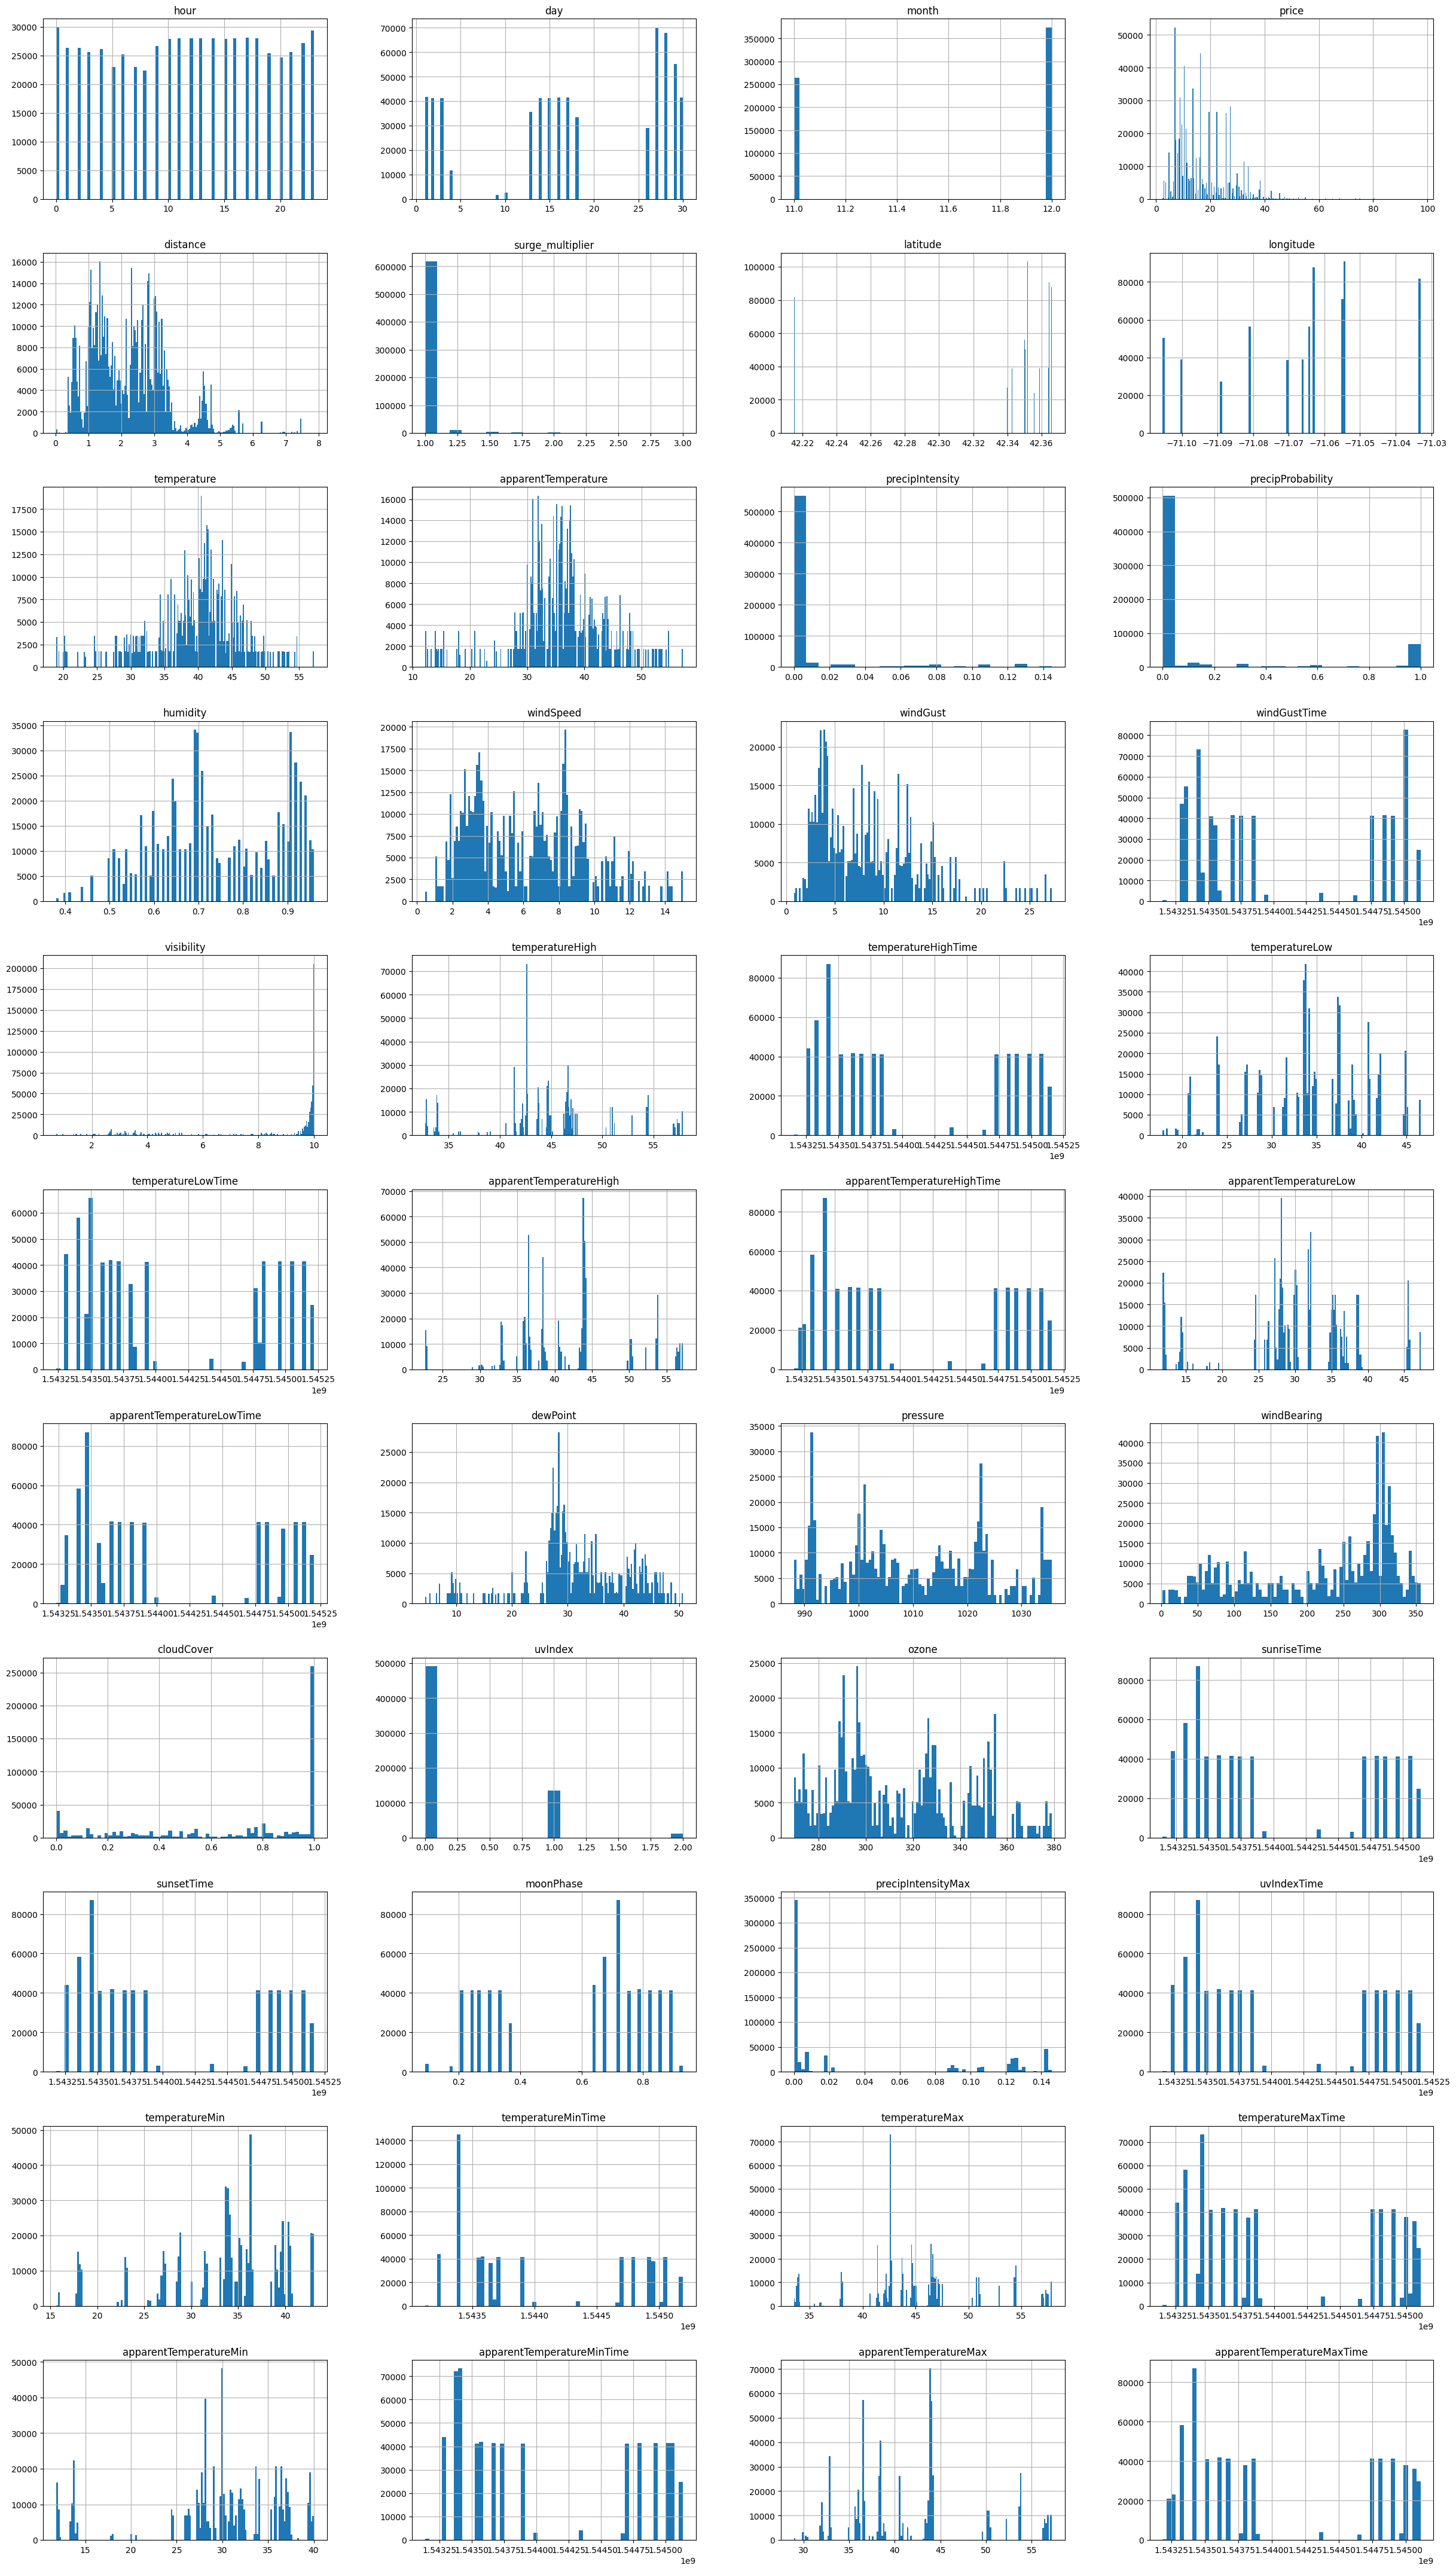

In [15]:
# Instances ditribution of numaric values in data
df.hist(bins='auto', layout=(14,4), figsize=(30,70))

In [16]:
# Creating function for the plots to get basic information and distributions in ploty express
def bar_plot(variable):
    df1 =df.groupby(variable).size().reset_index(name="counts")
    fig = px.bar(data_frame=df1, x=variable, y="counts", color=variable, barmode="group")
    fig.show()

In [17]:
# we observed, the data is distruted from 2018-11-26 to 2018-12-18
# data distribution amoung months
bar_plot('month')

* We can see more trip detils form december, not big difference particularly but more are from month 12. Lets check in dates

In [18]:
# To check distribution among dates from available window of available dates
bar_plot('day')

* we can see no rides in some dates, even with having aroound 20 days of data with 600K instances. For particular day we can check in above graph, it is intractive.

In [19]:
# Total number of rides among hours.
bar_plot('hour')

* data is well distributed, over all it looks more balances among hours.

In [20]:
df1= df[['source', 'destination', 'cab_type','name','short_summary','long_summary']]
df1.describe()

,source,destination,cab_type,name,short_summary,long_summary
count,637976,637976,637976,637976,637976,637976
unique,12,12,2,12,9,11
top,Financial District,Financial District,Uber,UberXL,Overcast,Mostly cloudy throughout the day.
freq,54197,54192,330568,55096,201429,186262


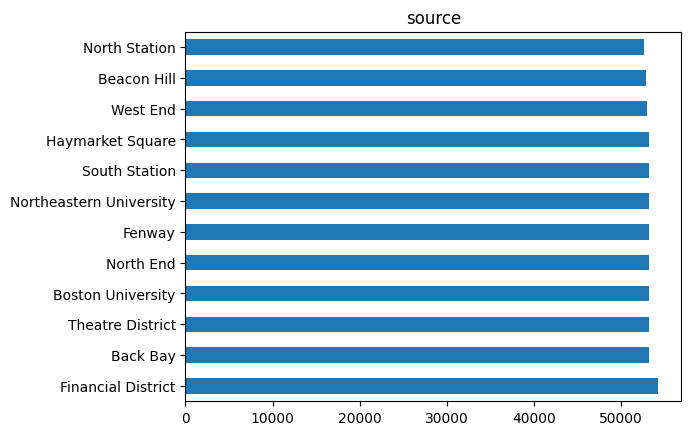

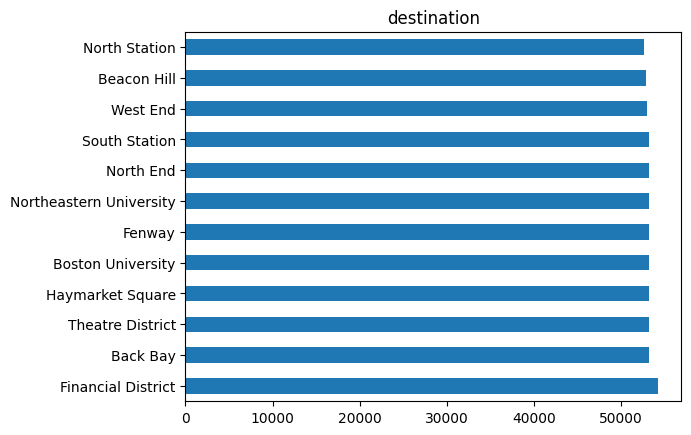

In [21]:
df['source'].value_counts().plot(kind='barh')
plt.title('source')
plt.show()
df['destination'].value_counts().plot(kind='barh')
plt.title('destination')
plt.show()

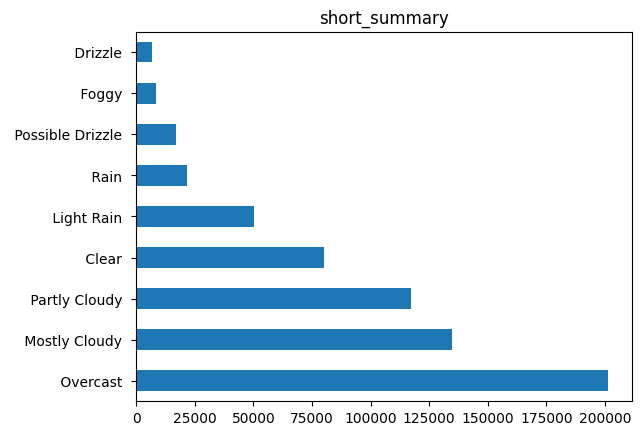

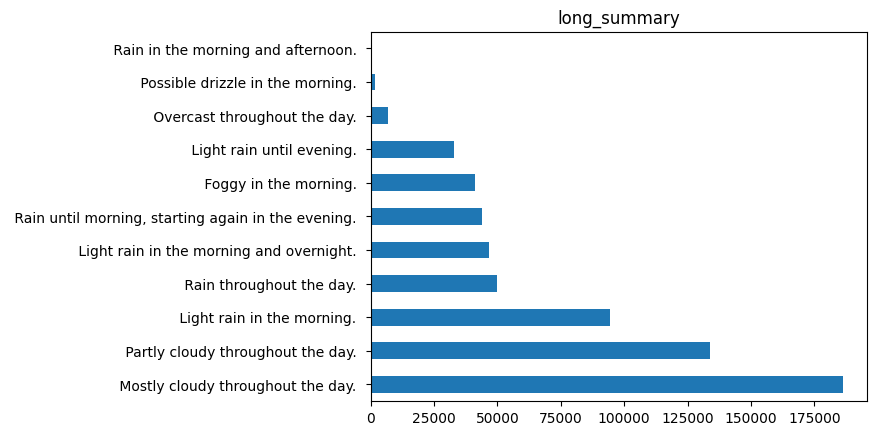

In [22]:
df['short_summary'].value_counts().plot(kind='barh')
plt.title('short_summary')
plt.show()
df['long_summary'].value_counts().plot(kind='barh')
plt.title('long_summary')
plt.show()

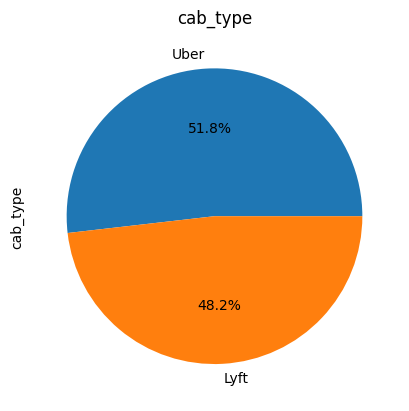

In [23]:
df['cab_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('cab_type')
plt.show()

In [24]:
fig = px.bar(df['name'].value_counts().reset_index(),
             x='name', y='index', orientation='h',
             labels={'index': 'Name', 'name': 'Count'},
             title='Name Distribution',
             color='index')
fig.show()

### Key observations
* Data is well balanced, and we did observe there is an unbalance in weather situations like rain, fog, cloud, clear, and drizzles.
* Other than that everything looks good like trip distribution every day, and distribution among different vehicles in trips, Uber rides, and Lyft rides, and I did observe most of the trips from December even though trips are from only November and December.
* And another key thing is we have categorical and continuous variables in data. I am expecting some of these features as important. Cause, we can expect some of the features like different vehicles and available vehicles at that time(surgemultiplier), distance, weather type, and temperature.
* In these there are important categorical variables like cab type and weather type. And continuous like distance, temperature, and surgemultiplier. these all are very important.
* About pick location, I think as categorical for this data but in real time it is gonna be continuous if considered as numbers like pincodes and house numbers. I believe they take it as a house number with a PIN code.

## Ckeecking price concerning important aspects like weather situation and starting places.
* For my observations I use variables from price and distance, which results in price per mile. Observing this with weather and locations will give more edge to my goal.
* Here I like to observe price variations concerning Weather data and source (starting position) data.
* We might face even one or two times, too much prices in Uber or Lyft in bad weather situations like rain or fog. I think the weather will affect the price of the trip, so observing variations in these details will provide clarity and add a bonus to feature engineering or correlations.
* While booking from popular places like stations or airports we will be charged more than normal prices, we don't care about these cases due to our urgencies. I wanna explore this situation also. So I am checking price values concerning sources.

In [25]:
# Adding new variable from two existing values
# Price per mile(PPM), it gives price paid by customer in each ride per each mile - Like standard measurement for observations.
df['PPM'] = df['price'].div(df['distance'])
df.PPM = df.PPM.round(2)

In [26]:
df['PPM'].head()

0    11.36
1    25.00
2    15.91
3    59.09
4    20.45
Name: PPM, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         637976 non-null  int64  
 1   day                          637976 non-null  int64  
 2   month                        637976 non-null  int64  
 3   datetime                     637976 non-null  object 
 4   source                       637976 non-null  object 
 5   destination                  637976 non-null  object 
 6   cab_type                     637976 non-null  object 
 7   product_id                   637976 non-null  object 
 8   name                         637976 non-null  object 
 9   price                        637976 non-null  float64
 10  distance                     637976 non-null  float64
 11  surge_multiplier             637976 non-null  float64
 12  latitude                     637976 non-null  float64
 13 

<Axes: title={'center': 'PPM Distribution'}, xlabel='Average of price per mile', ylabel='cab types'>

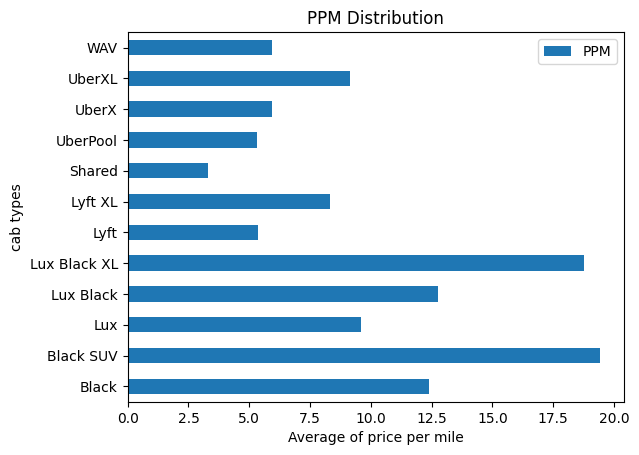

In [28]:
# PPM with respect to cab types
df[['name', 'PPM']].groupby(['name']).mean(['PPM']).plot.barh(title = 'PPM Distribution',ylabel='cab types', xlabel='Average of price per mile')

In [29]:
# Assuming 'df' is your DataFrame
uberx_df = df[df['name'] == 'UberX']
pivot_df_uberx = uberx_df.pivot_table(index=['name', 'short_summary'], values='PPM', aggfunc='mean').reset_index().round(2).sort_values(by=['PPM'], ascending=False)
uberx_df = uberx_df.sort_values(by='PPM')

In [30]:
fig = px.bar(pivot_df_uberx, x='short_summary', y='PPM', color='short_summary',
             title='Average PPM for UberX with Respect to Weather Type',
             labels={'PPM': 'Average Price Per Mile', 'short_summary': 'Weather Type', 'name': 'Cab Type'},
             text='PPM')

fig.show()

In [31]:
# PPM with respect to weather type
df[['name','short_summary','PPM']].groupby(['name','short_summary']).mean(['PPM'])

PPM
name  short_summary                
Black  Clear              12.333214
       Drizzle            12.588183
       Foggy              12.489586
       Light Rain         13.065209
       Mostly Cloudy      12.175150
...                             ...
WAV    Mostly Cloudy       5.876840
       Overcast            5.987582
       Partly Cloudy       5.937651
       Possible Drizzle    5.755814
       Rain                6.079300

[108 rows x 1 columns]

In [32]:
df.groupby(['short_summary', 'icon'])['icon'].count()

short_summary       icon                 
 Clear               clear-day                24679
                     clear-night              55577
 Drizzle             rain                      6725
 Foggy               fog                       8292
 Light Rain          rain                     50488
 Mostly Cloudy       partly-cloudy-day        55769
                     partly-cloudy-night      78834
 Overcast            cloudy                  201429
 Partly Cloudy       partly-cloudy-day        50568
                     partly-cloudy-night      66658
 Possible Drizzle    rain                     17176
 Rain                rain                     21781
Name: icon, dtype: int64

In [33]:
# Assuming 'df' is your DataFrame
uberx_df = df[df['name'] == 'UberX']
pivot_df_uberx = uberx_df.pivot_table(index=['name', 'source'], values='PPM', aggfunc='mean').reset_index().round(2).sort_values(by=['PPM'], ascending=False)

In [34]:
fig = px.bar(pivot_df_uberx, x='source', y='PPM', color='source',
             title='Average PPM for UberX with Respect to source',
             labels={'PPM': 'Average Price Per Mile', 'source': 'source', 'name': 'Cab Type'},
             text='PPM')

fig.show()

In [35]:
# PPM with respect to starting locations(Source)
df[['name','source','PPM']].groupby(['name','source']).mean(['PPM'])

PPM
name  source                            
Black Back Bay                 12.256826
      Beacon Hill               9.999588
      Boston University        10.001581
      Fenway                    8.359754
      Financial District       14.843721
...                                  ...
WAV   North Station             5.856704
      Northeastern University   4.052861
      South Station             6.603353
      Theatre District          6.703465
      West End                  5.786074

[144 rows x 1 columns]

In [36]:
# PPM with respect to starting locations(Source) and values count
df[['name','source','PPM']].groupby(['name','source']).agg({"PPM": [ 'count','mean']})

PPM           
                              count       mean
name  source                                  
Black Back Bay                 4591  12.256826
      Beacon Hill              4563   9.999588
      Boston University        4592  10.001581
      Fenway                   4591   8.359754
      Financial District       4660  14.843721
...                             ...        ...
WAV   North Station            4542   5.856704
      Northeastern University  4592   4.052861
      South Station            4590   6.603353
      Theatre District         4612   6.703465
      West End                 4582   5.786074

[144 rows x 2 columns]

In [37]:
df = df.drop(['PPM'], axis=1)

### Observations
* In first step I added variable(price per mile(ppm)) to dataframe.
* Then we can observe clearly, that there is a class difference in vehicles like luxury and comfort provided by vehicle. It started with sharing luxury vehicles. This clears that cab type going to be one of the key features while predicting price.
* After that we observed ppm concerning weather types like rain, fog, clear, and more. we can see the price of UberX is different in each weather type, even though it is small changes in number, we need to understand terms more here, like ppm is the price per single mile and that particular value is the mean of each weather type.
* While dealing with means, even small changes result in big changes. we can see in foggy conditions UberX value is more compared with other conditions which means Uber considers driving conditions concerning weather. Like driving in foggy weather is tough and driver availability is also less, we need to take that into account.
* Later I followed the same with Location. we can observe the same with locations also, from stations results more compared to normal values.
* These conclude my interest in this step as follows, From the above results I conclude prices are higher in bad weather or busy locations, it might be from available drivers or to manage supply-demand or bad weather.

## Feature selection
* subseting data based in weather balance - weather data is affecting price, so I am giving balanced state to model for better accuracies and even to work noraml in extreme weather conditions.
* correaltion ammong numarics variables to target variable
* Feature engineering

In [38]:
# subseting data based in weather balance
num_instances_per_short_summary_classe = 6000
df_temp = []

for classe in df['short_summary'].unique():
    temp = df[df['short_summary'] == classe].sample(n=num_instances_per_short_summary_classe,random_state=42)
    df_temp.append(temp)

df_small = pd.concat(df_temp, axis=0)
print('-'*60)
print('#instances per short summery class')
print(df_small['short_summary'].value_counts())
print('-'*60)
df_small.info()

------------------------------------------------------------
#instances per short summery class
 Mostly Cloudy        6000
 Rain                 6000
 Clear                6000
 Partly Cloudy        6000
 Overcast             6000
 Light Rain           6000
 Foggy                6000
 Possible Drizzle     6000
 Drizzle              6000
Name: short_summary, dtype: int64
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54000 entries, 454724 to 51048
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hour                         54000 non-null  int64  
 1   day                          54000 non-null  int64  
 2   month                        54000 non-null  int64  
 3   datetime                     54000 non-null  object 
 4   source                       54000 non-null  object 
 5   destination                  54000 non-nu

In [39]:
# Correlation
co_relation = df_small.corr()
co_relation

<ipython-input-39-b4beba7335ce>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
hour,1.000000,-0.039984,-0.008797,0.000651,0.006124,0.000331,0.034918,-0.060206,0.176416,0.213348,...,0.010193,-0.031417,-0.095494,-0.034264,0.001712,-0.030882,-0.044248,-0.036499,0.029968,-0.030610
day,-0.039984,1.000000,-0.852459,0.004766,0.010083,0.005377,-0.009954,0.175953,-0.096684,-0.223236,...,0.330459,-0.344153,0.017567,-0.342058,-0.400466,-0.347802,-0.052925,-0.337760,-0.475512,-0.348267
month,-0.008797,-0.852459,1.000000,-0.007619,-0.007458,-0.006577,0.103568,-0.149652,-0.133638,-0.069404,...,-0.445065,0.783583,-0.212217,0.781593,0.087450,0.785965,-0.219283,0.779012,0.125390,0.786251
price,0.000651,0.004766,-0.007619,1.000000,0.345565,0.247058,0.007645,-0.005664,0.001443,0.002912,...,0.010421,-0.008052,-0.000023,-0.008022,0.002586,-0.008065,0.002550,-0.007826,0.003741,-0.008138
distance,0.006124,0.010083,-0.007458,0.345565,1.000000,0.025084,-0.000895,-0.001387,-0.003462,-0.002472,...,0.004986,-0.001462,-0.004699,-0.001755,-0.006851,-0.001400,-0.003199,-0.001440,-0.006273,-0.001404
surge_multiplier,0.000331,0.005377,-0.006577,0.247058,0.025084,1.000000,0.000426,-0.000754,0.004035,0.002713,...,0.005777,-0.005430,0.000333,-0.005199,0.002335,-0.005523,0.000337,-0.005410,0.001845,-0.005510
latitude,0.034918,-0.009954,0.103568,0.007645,-0.000895,0.000426,1.000000,-0.558894,-0.138939,-0.098137,...,-0.102670,0.182540,-0.105647,0.183889,-0.118483,0.184092,-0.094900,0.183117,-0.093524,0.182066
longitude,-0.060206,0.175953,-0.149652,-0.005664,-0.001387,-0.000754,-0.558894,1.000000,-0.037061,-0.121326,...,0.110259,-0.065060,-0.063822,-0.072104,-0.149201,-0.065376,-0.104337,-0.071672,-0.165862,-0.064290
temperature,0.176416,-0.096684,-0.133638,0.001443,-0.003462,0.004035,-0.138939,-0.037061,1.000000,0.939661,...,0.397407,-0.354031,0.781946,-0.345302,0.752995,-0.353933,0.816581,-0.336212,0.689884,-0.355219
apparentTemperature,0.213348,-0.223236,-0.069404,0.002912,-0.002472,0.002713,-0.098137,-0.121326,0.939661,1.000000,...,0.314287,-0.386200,0.715217,-0.379584,0.805767,-0.384291,0.806257,-0.371183,0.794051,-0.385200


In [40]:
co_relation['price'].sort_values(ascending=False)

price                          1.000000
distance                       0.345565
surge_multiplier               0.247058
apparentTemperatureLow         0.012289
temperatureLow                 0.010579
precipIntensityMax             0.010421
latitude                       0.007645
pressure                       0.005753
day                            0.004766
precipIntensity                0.004235
apparentTemperatureHigh        0.003824
apparentTemperatureMax         0.003741
apparentTemperature            0.002912
precipProbability              0.002855
temperatureHigh                0.002743
temperatureMax                 0.002586
apparentTemperatureMin         0.002550
humidity                       0.002396
dewPoint                       0.002128
temperature                    0.001443
hour                           0.000651
cloudCover                     0.000362
uvIndex                        0.000020
temperatureMin                -0.000023
moonPhase                     -0.001328


In [41]:
# Taking all values which are more than even one percent correlate with price, cause there are few dominant features in the variables like distance and surge multiplier.
co_relation[co_relation['price'] > 0.01 ]['price'].sort_values(ascending=False)

price                     1.000000
distance                  0.345565
surge_multiplier          0.247058
apparentTemperatureLow    0.012289
temperatureLow            0.010579
precipIntensityMax        0.010421
Name: price, dtype: float64

* Even from correlation also we can observe, low temparature as important feature. Location is from boston and data is in november and december months so we can expect low temparatures.

In [42]:
df1 = df_small[['distance','surge_multiplier','apparentTemperatureLow','temperatureLow','precipIntensityMax','source','destination','cab_type','name','short_summary','long_summary','price']]

In [43]:
df1.head()

,distance,surge_multiplier,apparentTemperatureLow,temperatureLow,precipIntensityMax,source,destination,cab_type,name,short_summary,long_summary,price
454724,1.08,1.0,27.72,27.07,0.0001,North Station,North End,Lyft,Lux Black XL,Mostly Cloudy,Partly cloudy throughout the day.,26.0
602308,2.45,1.0,28.72,33.73,0.0004,Northeastern University,Beacon Hill,Lyft,Lux,Mostly Cloudy,Foggy in the morning.,16.5
360904,3.10,1.0,28.18,33.72,0.0004,Boston University,West End,Lyft,Lyft XL,Mostly Cloudy,Foggy in the morning.,19.5
551122,1.70,1.0,32.12,37.60,0.0000,South Station,West End,Uber,UberPool,Mostly Cloudy,Mostly cloudy throughout the day.,9.0
124097,2.32,1.0,12.30,24.05,0.0217,Beacon Hill,Fenway,Uber,UberX,Mostly Cloudy,Light rain in the morning.,9.5


In [44]:
label_encoder = preprocessing.LabelEncoder()
df1['source']= label_encoder.fit_transform(df_small['source'])
df1['destination']= label_encoder.fit_transform(df_small['destination'])
df1['cab_type']= label_encoder.fit_transform(df_small['cab_type'])
df1['name']= label_encoder.fit_transform(df_small['name'])
df1['short_summary']= label_encoder.fit_transform(df_small['short_summary'])
df1['long_summary']= label_encoder.fit_transform(df_small['long_summary'])


<ipython-input-44-8ec9725368c0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-8ec9725368c0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-8ec9725368c0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-8ec9725

In [45]:
X = df1[df1.columns[:-1]].values
y = df1[df1.columns[-1]].values

In [46]:
X.shape

(54000, 11)

In [47]:
y.shape

(54000,)

In [48]:
rf_reg = RandomForestRegressor( random_state=3)
rf_reg.fit(X, y)

RandomForestRegressor(random_state=3)

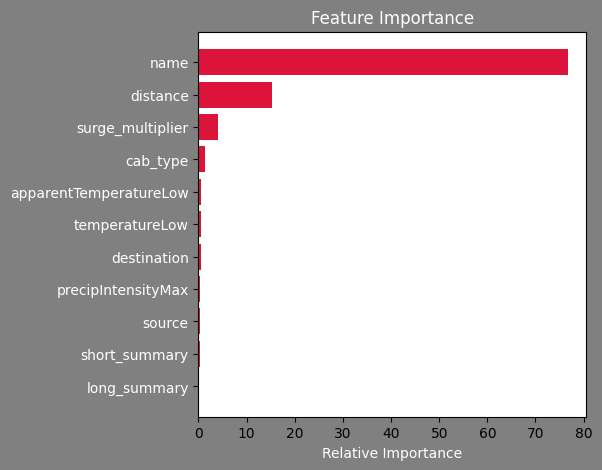

In [49]:
# Calculating the feature importance
feature_importance = rf_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
# Displaying feature importance through bar chart
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(5,5),facecolor='Grey')
plt.title("Feature Importance",color='white')
plt.xlabel('Relative Importance',color='white')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, df1.columns[:-1][sorted_idx],color='white')
plt.show()

### Key Features
* I observed, the cab name is the most important feature. It is a categorical variable.
* After that we can observe, that distance and surge multiplier are important and these are continuous.
* Here comes the main problem, we need only either of the variables to perform the machine learning model.
* After thinking about different scenarios, I decided to do multiple regression each time for the same parameters using each model by training each cab name.
* * The first case I thought was using only continuous features, but the outcome might be with less accuracy. Due to different cab names having a range of prices, like normally named cab may be around 10 dollars to reach from x to y. For luxury named cabs or larger cabs, this price is going to be much more like 15 or 20 dollars. So training regression models with these values might result in a less accurate model.
* * Second case, considering categorical features. If I follow that we might lose important features like distance and surge multiplier, which are also key features for calculating price.
* After thinking of these scenarios, I came up with one hot encoding that is a better choice while performing regression.

## MODEL SELECTION
* My target while selecting the model is simple, not complex, robust, and more accurate.
* I left with a few choices like linear, lasso, elastic, and tree. In these regressions lasso and elastic regressions are good but they are prone to a degree of freedom. For future flexibility like expanding the model to extreme conditions, these might not best option.
* Coming to trees, these are simple however small distances in data will change the price prediction.
* Now, I left with linear simple and fast, so let's check its accuracy.

### Linear regression

In [50]:
df1 = df_small [['hour','day','month','price','distance','surge_multiplier','temperatureLow','apparentTemperatureLow','precipIntensityMax','source','destination','cab_type','name']]

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54000 entries, 454724 to 51048
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    54000 non-null  int64  
 1   day                     54000 non-null  int64  
 2   month                   54000 non-null  int64  
 3   price                   54000 non-null  float64
 4   distance                54000 non-null  float64
 5   surge_multiplier        54000 non-null  float64
 6   temperatureLow          54000 non-null  float64
 7   apparentTemperatureLow  54000 non-null  float64
 8   precipIntensityMax      54000 non-null  float64
 9   source                  54000 non-null  object 
 10  destination             54000 non-null  object 
 11  cab_type                54000 non-null  object 
 12  name                    54000 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 5.8+ MB


In [52]:
import pandas as pd

df1 = df_small[['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'temperatureLow', 'apparentTemperatureLow',
                'precipIntensityMax', 'source', 'destination', 'cab_type', 'name']]
continuous_columns = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = df1.select_dtypes(include=['object', 'category']).columns.tolist()
dummy_features = pd.get_dummies(df1[cat_columns], drop_first=True, dummy_na=True)


df1 = pd.concat([df1, dummy_features], axis=1)
df1.drop(cat_columns, axis=1, inplace=True)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54000 entries, 454724 to 51048
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   hour                                 54000 non-null  int64  
 1   day                                  54000 non-null  int64  
 2   month                                54000 non-null  int64  
 3   price                                54000 non-null  float64
 4   distance                             54000 non-null  float64
 5   surge_multiplier                     54000 non-null  float64
 6   temperatureLow                       54000 non-null  float64
 7   apparentTemperatureLow               54000 non-null  float64
 8   precipIntensityMax                   54000 non-null  float64
 9   source_Beacon Hill                   54000 non-null  uint8  
 10  source_Boston University             54000 non-null  uint8  
 11  source_Fenway          

In [54]:
df1.rename(columns = {'source_nan':'source_Back Bay',"destination_nan":"destination_Back Bay","cab_type_nan":"cab_type_Lyft","name_nan":"name_Black"}, inplace = True)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54000 entries, 454724 to 51048
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   hour                                 54000 non-null  int64  
 1   day                                  54000 non-null  int64  
 2   month                                54000 non-null  int64  
 3   price                                54000 non-null  float64
 4   distance                             54000 non-null  float64
 5   surge_multiplier                     54000 non-null  float64
 6   temperatureLow                       54000 non-null  float64
 7   apparentTemperatureLow               54000 non-null  float64
 8   precipIntensityMax                   54000 non-null  float64
 9   source_Beacon Hill                   54000 non-null  uint8  
 10  source_Boston University             54000 non-null  uint8  
 11  source_Fenway          

In [56]:
X = df1.drop('price', axis = 1)
y= df1['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

In [58]:
print(X_train.shape)
print(y_train.shape)

(37800, 46)
(37800,)


In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # Instantiate
reg.fit(X_train, y_train) # Fit the train data
r2_train_score = reg.score(X_train, y_train) # Calculating R^2 score for train
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9292 

Coefficients of Linear Model: [ 3.82682283e-03  5.13146802e-03  7.30622866e-02  2.91966850e+00
  1.82666996e+01  2.17598904e-03  5.44824479e-04  2.73343112e-01
 -4.21958810e-01  1.14785625e+11  1.14785625e+11  2.72902235e-01
  1.14785625e+11  1.14785625e+11 -1.15548241e-02  1.14785625e+11
  1.14785625e+11  3.32344391e-01 -1.51445833e-02  1.90001722e+07
 -3.55812163e-01  1.14785625e+11  1.14785625e+11  3.80391823e-01
  1.14785625e+11  1.14785625e+11  1.89323043e-01  1.14785625e+11
  1.14785625e+11  2.60539491e-01 -6.62058098e-02 -2.95974314e-06
  1.56262262e+10 -2.85920509e-05  9.70482194e+00  1.56262262e+10
  1.56262262e+10  1.56262262e+10  1.56262262e+10  1.56262262e+10
  1.56262262e+10 -1.17328274e+01 -1.06861272e+01 -4.81773311e+00
 -1.07803256e+01  0.00000000e+00] 

Intercept: -130411851329.39636


In [60]:
r2_test_score = reg.score(X_test, y_test) # Calculating R^2 score for train
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.929 



* Getting almost 93 r^2 score is good, let's check about neural networks then we can decide.

In [61]:
df_train, df_test = train_test_split(df1, train_size=0.9, random_state = 100)

In [62]:
print("X train data size ->", df_train.shape)
print("X test data size ->", df_test.shape)

X train data size -> (48600, 47)
X test data size -> (5400, 47)


In [63]:
y_train = df_train.pop('price')
X_train = df_train

In [64]:
y_test = df_test.pop('price')
X_test = df_test

In [65]:
X_train.shape[1]

46

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [67]:
def r2_score_metric(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

In [68]:
tf.random.set_seed(42)

model=Sequential()
model.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=[r2_score_metric])#,metrics=['mean_absolute_error'])

In [69]:
epochs=25
history = model.fit(
    np.array(X_train.values),y_train,
    epochs=epochs,
    validation_split=0.2,
    batch_size=128
)

Epoch 1/25
304/304 [==============================] - 3s 5ms/step - loss: 113.1420 - r2_score_metric: -0.3088 - val_loss: 76.1702 - val_r2_score_metric: 0.1192
Epoch 2/25
304/304 [==============================] - 1s 5ms/step - loss: 61.3911 - r2_score_metric: 0.2857 - val_loss: 46.5559 - val_r2_score_metric: 0.4622
Epoch 3/25
304/304 [==============================] - 1s 5ms/step - loss: 30.9894 - r2_score_metric: 0.6393 - val_loss: 16.2526 - val_r2_score_metric: 0.8139
Epoch 4/25
304/304 [==============================] - 1s 3ms/step - loss: 10.6007 - r2_score_metric: 0.8786 - val_loss: 8.1409 - val_r2_score_metric: 0.9073
Epoch 5/25
304/304 [==============================] - 1s 2ms/step - loss: 7.7567 - r2_score_metric: 0.9115 - val_loss: 7.1777 - val_r2_score_metric: 0.9184
Epoch 6/25
304/304 [==============================] - 1s 2ms/step - loss: 7.0343 - r2_score_metric: 0.9200 - val_loss: 6.5841 - val_r2_score_metric: 0.9251
Epoch 7/25
304/304 [==============================] - 1

In [70]:
# Assuming you have 'history' as the result of model training
history_df = pd.DataFrame(history.history)

# Melt the DataFrame to have 'variable' and 'value' columns
history_melted = pd.melt(history_df.reset_index(), id_vars='index', value_vars=['r2_score_metric', 'val_r2_score_metric', 'loss', 'val_loss'],
                         var_name='Metric', value_name='Value')

# Rename the 'index' column to 'Epoch'
history_melted.rename(columns={'index': 'Epoch'}, inplace=True)

# Separate R2 score and loss plots
r2_fig = px.line(history_melted[history_melted['Metric'].str.contains('r2_score_metric')],
                 x='Epoch', y='Value', color='Metric',
                 labels={'Value': 'R2 Score', 'Epoch': 'Epoch'},
                 title='R2 Score Curve')

loss_fig = px.line(history_melted[history_melted['Metric'].str.contains('loss')],
                   x='Epoch', y='Value', color='Metric',
                   labels={'Value': 'Loss', 'Epoch': 'Epoch'},
                   title='Loss Curve')

r2_fig.show()
loss_fig.show()

## CONCLUSIONS
* I think Neural networks and Linear both are best for this data, getting nearly 93
* Based on the requirements, we can use the chosen model. I prefer neural networks cause of more r^2 score. Even a slight change in the price prediction will change the reputation of the company.
* The Problem I faced for this project is data quality. With updated data and having quality data is a different story.
* It is definitely a great experience to work on this project.
* THANK YOU

